In [22]:
import keras
from keras.utils import np_utils,plot_model
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.layers import Conv2D,MaxPool2D
from keras.datasets import mnist
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [23]:
# training parameters
batch_size = 50
epoch = 15

(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [24]:
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]
print(img_rows,img_cols)

28 28


In [25]:
# We need to add a 4th dimension to our image thereby changing the original dimemnsion from (60000, 28, 28) 
# to (60000, 28, 28,1). 
x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
print(x_train.shape)
print(x_test.shape)

# shape of a single image
input_shape = (img_rows,img_cols,1)
input_shape

(60000, 28, 28, 1)
(10000, 28, 28, 1)


(28, 28, 1)

In [26]:
# Now,lets convert the data type of the image pixels to float
x_train = x_train.astype(float)
x_test = x_test.astype(float)

# Let's normalize the images by dividing the pixels by 255
x_train = x_train/255
x_test = x_test/255

# We check the shape of our data
print('x_train shape: ',x_train.shape)
print('x_test shape: ',x_test.shape)

x_train shape:  (60000, 28, 28, 1)
x_test shape:  (10000, 28, 28, 1)


In [28]:
# Now,it's time to encode the categorical target output
# y_train = np_utils.to_categorical(y_train)
# y_test = np_utils.to_categorical(y_test)
# num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

print('Number of image class: {}'.format(y_train.shape))
print('Number of image class: {}'.format(y_test.shape))
print('Number of image pixels: {}'.format(num_pixels))

Number of image class: (60000,)
Number of image class: (10000,)
Number of image pixels: 784


### **CNN Model According to AdaSqrt Paper**

In [29]:
# Neural network
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer = keras.optimizers.Adadelta(),
             metrics = ['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_17 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


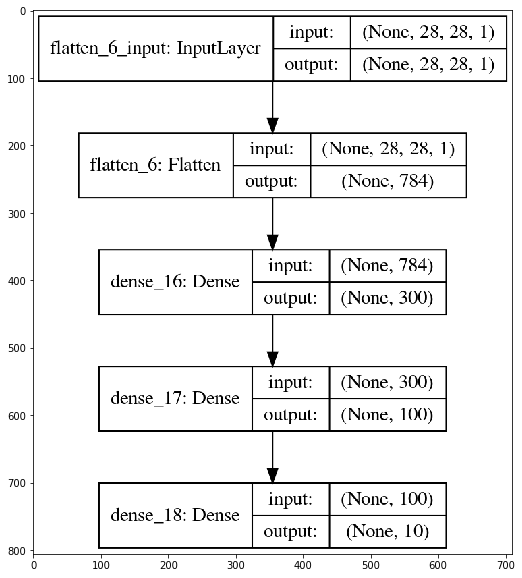

In [30]:
plot_model(model, to_file = 'modelmnist.png', show_layer_names=True,show_shapes=True,dpi=150)

plt.figure(figsize=(20,10))
img = mpimg.imread('modelmnist.png')
imgplot = plt.imshow(img)

In [31]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epoch, verbose=1, 
          shuffle=True,class_weight='categorical',validation_data=(x_test,y_test))

score = model.evaluate(x_test,y_test,verbose=1)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))


Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 5s 89us/step - loss: 0.2289 - accuracy: 0.9315 - val_loss: 0.1113 - val_accuracy: 0.9657
Epoch 2/15
60000/60000 [==============================] - 5s 88us/step - loss: 0.0891 - accuracy: 0.9728 - val_loss: 0.0853 - val_accuracy: 0.9738
Epoch 3/15
60000/60000 [==============================] - 6s 93us/step - loss: 0.0609 - accuracy: 0.9810 - val_loss: 0.0795 - val_accuracy: 0.9758
Epoch 4/15
60000/60000 [==============================] - 5s 91us/step - loss: 0.0432 - accuracy: 0.9867 - val_loss: 0.0635 - val_accuracy: 0.9809
Epoch 5/15
60000/60000 [==============================] - 4s 73us/step - loss: 0.0327 - accuracy: 0.9901 - val_loss: 0.0644 - val_accuracy: 0.9805
Epoch 6/15
60000/60000 [==============================] - 4s 72us/step - loss: 0.0244 - accuracy: 0.9924 - val_loss: 0.0640 - val_accuracy: 0.9809
Epoch 7/15
60000/60000 [==============================] - 5s 84us/st

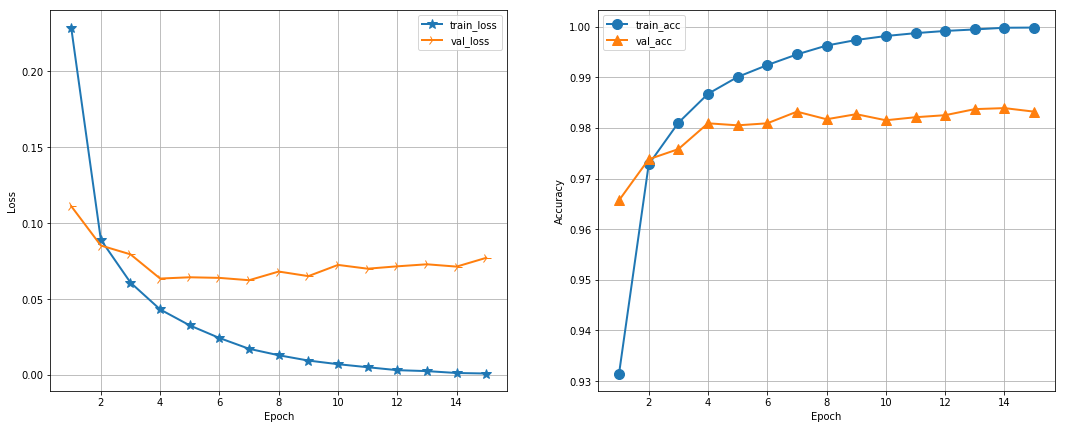

In [32]:
train_loss = model.history.history['loss']
train_acc = model.history.history['accuracy']
val_loss = model.history.history['val_loss']
val_acc = model.history.history['val_accuracy']

plt.figure(figsize=(18,7))
epok = range(1,len(val_loss)+1)
plt.subplot(121)
line1 = plt.plot(epok,train_loss,label='train_loss')
line2 = plt.plot(epok,val_loss,label='val_loss')
plt.setp(line1,linewidth = 2,marker = '*',markersize = 10)
plt.setp(line2,linewidth =2,marker='4',markersize = 10)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.subplot(122)
line3 = plt.plot(epok,train_acc,label='train_acc')
line4 = plt.plot(epok,val_acc,label='val_acc')
plt.setp(line3,linewidth=2,marker = 'o',markersize=10)
plt.setp(line4,linewidth =2,marker = '^',markersize = 10)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.show()